**1. Utilities (mathematical tools) and PINN for tappered 1D rod**

In [9]:
from physics_informed_q1 import PhysicsInformedBarModel_q1
import utilities_q1
import numpy as np
import torch  
import matplotlib.pyplot as plt

**2. Analytical solution**

In [10]:
u_a = lambda x: 5*np.log(1+x)

**3. Defining problem**

In [11]:
E = lambda x: 2
A = lambda x: 1 + x
L = 1
u0 = [0]  # Dirichlet boundary conditions for left (x =0) edges
Load = lambda x: 10

**4. Generate neural network.**

In [12]:
pinnModel = PhysicsInformedBarModel_q1(E, A, L, u0, load = Load)

check 2


**5. Training the model**

In [13]:
epochs = 500
learningRate = 1e-2

pinnModel.train(epochs, optimizer='LBFGS', lr=learningRate)

Epoch: 0/499		Differential equation loss = 4882.943848		Boundary condition loss = 94.954239		Total loss = 4977.897949
Epoch: 100/499		Differential equation loss = 0.000021		Boundary condition loss = 0.000001		Total loss = 0.000022
Epoch: 200/499		Differential equation loss = 0.000002		Boundary condition loss = 0.000000		Total loss = 0.000003
Epoch: 300/499		Differential equation loss = 0.000002		Boundary condition loss = 0.000000		Total loss = 0.000003
Epoch: 400/499		Differential equation loss = 0.000002		Boundary condition loss = 0.000000		Total loss = 0.000002
Epoch: 499/499		Differential equation loss = 0.000002		Boundary condition loss = 0.000000		Total loss = 0.000002


**6. Generating sample data**

In [14]:
samples = 100
x_test = utilities_q1.generate_grid_1d(L, samples)
u_test = pinnModel.get_displacements(x_test)

**7. Plots required**

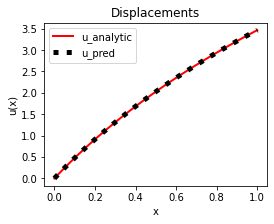

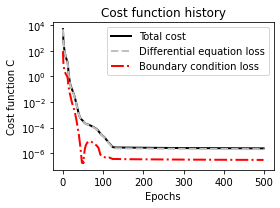

In [15]:
utilities_q1.plot_displacements_bar(x_test, u_test, u_a)
pinnModel.plot_training_history()